**Nombre:** Samuel Cortes Salazar\
**Fecha:** 09/02/2024

In [10]:
%%writefile BesselPorSimpson.cpp

#include <iostream>
#include <cmath>
using namespace std;

double f(double t, double alpha, double x){
  return cos(alpha*t-x*sin(t));
}

double IntegralPorSimpson(double a, double b, double n, double alpha, double x){
  double m=2*n;
  double h=(b-a)/n;
  double suma=0;
  double f(double t, double alpha, double x);
  for(int i=0;i<=m+1;i++){
    double t=a+i*h;
    if(i==0||i==n){
      suma=+f(t,alpha,x);
    }
    else if(i%2==0){
      suma+=2*f(t,alpha,x);
    }
    else{
      suma+=4*f(t,alpha,x);
    }
  }
  return suma*h/3;
}

double Bessel(double alpha, double x){
  double a=0, b=M_PI, n=100;
  return IntegralPorSimpson(a, b, n, alpha, x);
}

int main(){
  double x0=0, xf=10, alpha=0;
  double x;
  for(x=x0;x<=xf;x+=0.1){
    cout<<x<<" "<<Bessel(alpha,x)<<endl;
  }
  return 0;
}

Overwriting BesselPorSimpson.cpp


In [11]:
!g++ BesselPorSimpson.cpp && ./a.out > datos.dat

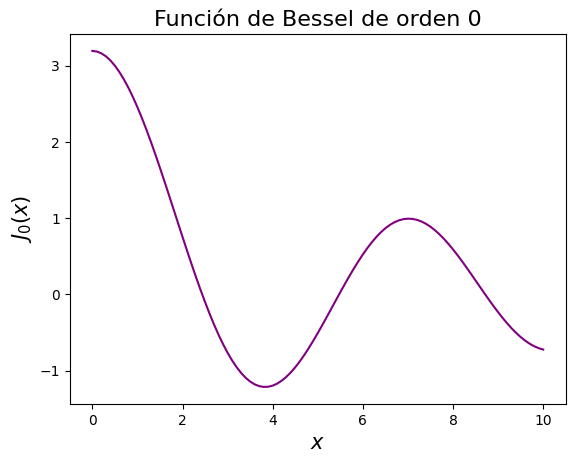

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sci

Nsteps=101

xdata=np.zeros(Nsteps)
ydata=np.zeros(Nsteps)

f = open('datos.dat', 'r')
i=0
for line in f:
    line = line.strip()
    columns = line.split()
    xdata[i] = float(columns[0])
    ydata[i] = float(columns[1])
    i+=1
f.close()

plt.plot(xdata,ydata,'purple')
plt.xlabel("$x$",size=15)
plt.ylabel("$J_{0}(x)$",size=15)
plt.title("Función de Bessel de orden 0",size=16)
plt.show()